# hierarchial example:

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering 
from scipy.spatial import distance_matrix 
from scipy.cluster import hierarchy 


In [2]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

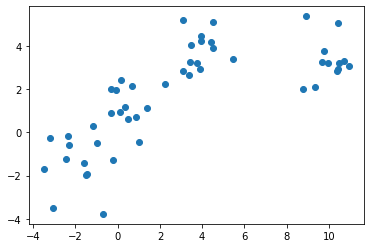

In [3]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 


In [4]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')


In [5]:
agglom.fit(X1,y1)


AgglomerativeClustering(linkage='average', n_clusters=4)

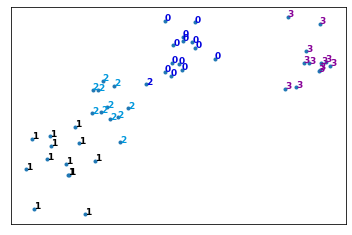

In [6]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

In [7]:
dist_matrix = distance_matrix(X1,X1) 
dist_matrix


array([[0.        , 0.77362862, 0.7438639 , ..., 0.24591913, 0.54175613,
        0.16327942],
       [0.77362862, 0.        , 0.09881646, ..., 0.54968446, 0.24404201,
        0.78450887],
       [0.7438639 , 0.09881646, 0.        , ..., 0.50755401, 0.25360708,
        0.73528186],
       ...,
       [0.24591913, 0.54968446, 0.50755401, ..., 0.        , 0.34158923,
        0.23743986],
       [0.54175613, 0.24404201, 0.25360708, ..., 0.34158923, 0.        ,
        0.57806111],
       [0.16327942, 0.78450887, 0.73528186, ..., 0.23743986, 0.57806111,
        0.        ]])

In [8]:
Z = hierarchy.linkage(dist_matrix, 'complete')
Z

/tmp/ipykernel_23636/2842153072.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


array([[7.00000000e+00, 4.30000000e+01, 2.04436840e-02, 2.00000000e+00],
       [8.00000000e+00, 2.00000000e+01, 3.72723629e-02, 2.00000000e+00],
       [3.00000000e+01, 3.40000000e+01, 8.56592824e-02, 2.00000000e+00],
       [2.70000000e+01, 3.60000000e+01, 8.91429424e-02, 2.00000000e+00],
       [1.70000000e+01, 2.90000000e+01, 9.70623934e-02, 2.00000000e+00],
       [3.20000000e+01, 3.50000000e+01, 1.08714020e-01, 2.00000000e+00],
       [5.00000000e+00, 1.20000000e+01, 1.12209684e-01, 2.00000000e+00],
       [1.90000000e+01, 2.50000000e+01, 1.19932444e-01, 2.00000000e+00],
       [9.00000000e+00, 4.20000000e+01, 1.30041424e-01, 2.00000000e+00],
       [1.00000000e+01, 4.70000000e+01, 1.51633193e-01, 2.00000000e+00],
       [1.80000000e+01, 5.10000000e+01, 1.62441812e-01, 3.00000000e+00],
       [4.80000000e+01, 5.50000000e+01, 1.66236850e-01, 3.00000000e+00],
       [3.00000000e+00, 4.10000000e+01, 1.78702503e-01, 2.00000000e+00],
       [2.30000000e+01, 3.80000000e+01, 2.09801012e

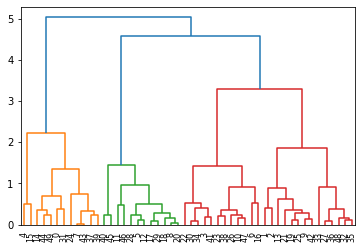

In [9]:
dendro = hierarchy.dendrogram(Z)
